In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.serif"] = ["Computer Modern"]
np.set_printoptions(precision=3)

In [17]:

def solver(dt, T, w=0.35, I=1):
    """
    Solve Eq. (1)

    Parameters
    ----------
    dt : float
        Time step
    T : float
        End time
    I, w : float, optional
        Model parameters

    Returns
    -------
    t : array_like
        Discrete times (0, dt, 2*dt, ..., T)
    u : array_like
        The solution at discrete times t
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)
    u[0] = I
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return t, u

def u_exact(t, w=0.35, I=1):
    """Exact solution of Eq. (1)

    Parameters
    ----------
    t : array_like
        Array of times to compute the solution
    I, w : float, optional
        Model parameters

    Returns
    -------
    ue : array_like
        The solution at times t
    """
    return I*np.cos(w*t)

In [18]:
def l2_error(dt, T, w=0.35, I=0.3, sol=solver):
    """Compute the l2 error norm of result from `solver`

    Parameters
    ----------
    dt : float
        Time step
    T : float
        End time
    I, w : float, optional
        Model parameters
    sol : callable
        The function that solves Eq. (1)

    Returns
    -------
    float
        The l2 error norm
    """
    t, u = sol(dt, T, w, I)
    ue = u_exact(t, w, I)
    return np.sqrt(dt*np.sum((ue-u)**2))

In [19]:
def convergence_rates(m, dt0=30, num_periods=8, w=0.35, I=0.3, sol=solver):
    """
    Return m-1 empirical estimates of the convergence rate
    based on m simulations, where the time step is halved
    for each simulation.

    Parameters
    ----------
    m : int
        The number of mesh levels
    dt0 : int, optional
        Time steps per period on coarsest level
    num_periods : int, optional
        Size of domain is num_periods * 2pi / w
    w, I : float, optional
        Model parameters
    sol : callable
        The function that solves Eq. (1)

    Returns
    -------
    array_like
        The m-1 convergence rates
    array_like
        The m errors of the m meshes
    array_like
        The m time steps of the m meshes

    """
    P = 2*np.pi/w
    dt = P/dt0
    T = P*num_periods
    dt_values, E_values = [], []
    for i in range(m):
        E = l2_error(dt, T, w, I, sol=sol)
        dt_values.append(dt)
        E_values.append(E)
        dt = dt/2
    # Compute m-1 orders that should all be the same
    r = [np.log(E_values[i-1]/E_values[i])/
         np.log(dt_values[i-1]/dt_values[i])
         for i in range(1, m, 1)]
    return r, E_values, dt_values

In [20]:
convergence_rates(4)

([2.0036366687367093, 2.0009497328195964, 2.000240106059535],
 [0.13526035155205304,
  0.03372995596052594,
  0.008426939670390834,
  0.0021063843253281145],
 [0.5983986006837702,
  0.2991993003418851,
  0.14959965017094254,
  0.07479982508547127])

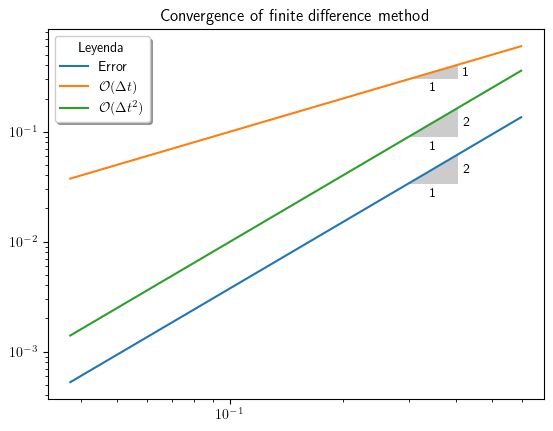

In [29]:
r, E, dt = convergence_rates(5)
plt.loglog(dt, E)
plt.loglog(dt, dt)
plt.loglog(dt, np.array(dt)**2)
plt.title('Convergence of finite difference method')
plt.legend(title="Leyenda", labels=['Error', '$\mathcal{O}(\Delta t)$', '$\mathcal{O}(\Delta t^2)$'], shadow=True, fancybox=True)
from plotslopes import slope_marker
slope_marker((dt[1], E[1]), (2,1))
slope_marker((dt[1], dt[1]), (1,1))
slope_marker((dt[1], dt[1]**2), (2,1))
plt.savefig("foo.pdf", transparent=True, bbox_inches="tight")

In [22]:
def test_order(m):
    r, E, dt = convergence_rates(m)
    assert np.allclose(np.array(r), 2, atol=1e-2)

In [23]:
test_order(5)

In [24]:
!(curl -O https://raw.githubusercontent.com/MATMEK-4270/matmek4270-book/main/plotslopes.py)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  4386  100  4386    0     0  15050      0 --:--:-- --:--:-- --:--:-- 15124


In [25]:
!(ls)

convergence.ipynb     geometry.beamer.aux  geometry.beamer.tex	 indent.log
foo.ipynb	      geometry.beamer.log  geometry.beamer.toc	 plotslopes.py
geometry.article.aux  geometry.beamer.nav  geometry.handout.log  __pycache__
geometry.article.log  geometry.beamer.out  geometry.handout.pdf  Untitled.ipynb
geometry.article.pdf  geometry.beamer.pdf  geometry.handout.tex
geometry.article.tex  geometry.beamer.snm  geometry.tex


In [30]:
dt = 0.1
T = 10
Nt = int(round(T/dt))
t = np.linspace(0, Nt*dt, Nt+1)
u = t**2
uc = (u[2:] - 2*u[1:-1] + u[:-2])/dt**2
assert np.allclose(uc, 2)

In [31]:
dt = 0.1
Nt = int(round(T/dt))
t = np.linspace(0, Nt*dt, Nt+1)
u = t**4
uc = (u[2:] - 2*u[1:-1] + u[:-2])/dt**2
print(uc-12*t[1:-1]**2)

[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02]


In [32]:
assert np.allclose(uc-12*t[1:-1]**2, 2*dt**2)

In [33]:
def adj_solver(dt, T, w=0.35, I=1):
    """
    Solve Eq. (1)

    Parameters
    ----------
    dt : float
        Time step
    T : float
        End time
    I, w : float, optional
        Model parameters

    Returns
    -------
    t : array_like
        Discrete times (0, dt, 2*dt, ..., T)
    u : array_like
        The solution at discrete times t
    """
    dt = float(dt)
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)
    u[0] = I
    u[1] = u[0] - 0.5*dt**2*(w*(1-w**2*dt**2/24))**2*u[0]
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*(w*(1-w**2*dt**2/24))**2*u[n]
    return t, u

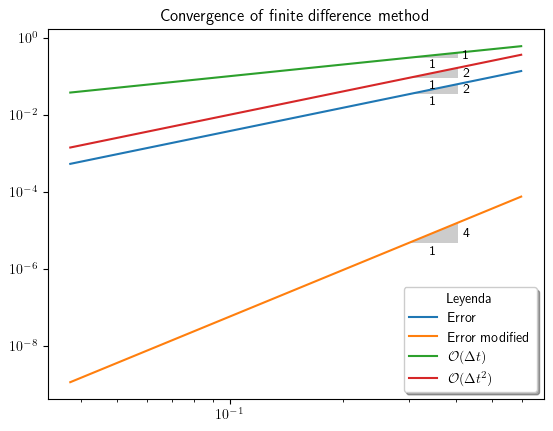

In [35]:
r, E, dt = convergence_rates(5, sol=solver)
r2, E2, dt2 = convergence_rates(5, sol=adj_solver)
plt.loglog(dt, E)
plt.loglog(dt2, E2)
plt.loglog(dt, dt)
plt.loglog(dt, np.array(dt)**2)
plt.title('Convergence of finite difference method')
plt.legend(title="Leyenda", labels=['Error', 'Error modified', '$\mathcal{O}(\Delta t)$', '$\mathcal{O}(\Delta t^2)$'], shadow=True, fancybox=True)
from plotslopes import slope_marker
slope_marker((dt[1], E[1]), (2,1))
slope_marker((dt2[1], E2[1]), (4,1))
slope_marker((dt[1], dt[1]), (1,1))
slope_marker((dt[1], dt[1]**2), (2,1))
plt.savefig("foo2.pdf", transparent=True, bbox_inches="tight")

In [38]:
N = 8
a = 2
I = 1
theta = 0.5
dt = 0.5
T = N*dt
t = np.linspace(0, N*dt, N+1)
u = np.zeros(N+1)
C = (1 - (1-theta) * a * dt)/(1 + theta * a * dt)
u[0] = I
for n in range(N):
    u[n+1] = C * u[n]

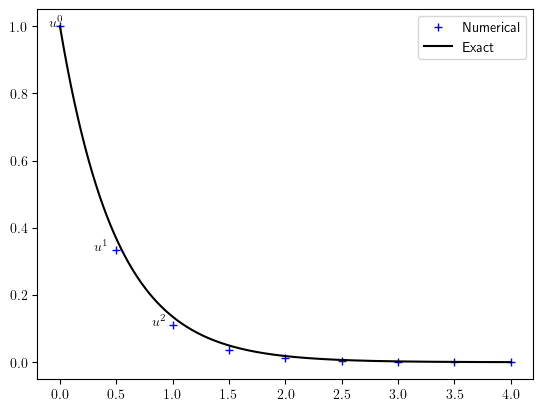

In [39]:
te = np.linspace(0, N*dt, 1001)
plt.plot(t, u, 'b+', te, np.exp(-a*te), 'k')
plt.legend(['Numerical', 'Exact'])
plt.text(-0.1, u[0], '$u^0$')
plt.text(0.3, u[1], '$u^1$')
plt.text(0.82, u[2], '$u^2$');

In [41]:
from scipy import sparse
A = sparse.diags([np.full(N, -C), np.ones(N+1)], np.array([-1, 0]), (N+1, N+1), 'csr')
print(A.toarray())

[[ 1.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.333  1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.333  1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.333  1.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.333  1.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.333  1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.333  1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.333  1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.333  1.   ]]


In [42]:
b = np.zeros(N+1)
b[0] = I
un = sparse.linalg.spsolve_triangular(A, b, lower=True, unit_diagonal=True)
print(un)

[1.000e+00 3.333e-01 1.111e-01 3.704e-02 1.235e-02 4.115e-03 1.372e-03
 4.572e-04 1.524e-04]


In [43]:
un-u

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
D2 = sparse.diags([np.ones(N), np.full(N+1, -2), np.ones(N)], np.array([-1, 0, 1]), (N+1, N+1), 'lil')
print(D2.toarray())

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]


In [47]:
D2[0, :4] = 2, -5, 4, -1
D2[-1, -4:] = -1, 4, -5, 2
D2 *= (1/dt**2) # don't forget h
print(D2.toarray()*dt**2)

[[ 2. -5.  4. -1.  0.  0.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.  0.  0.  0.  0.]
 [ 0.  4. -8.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  4. -8.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  4. -8.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  4. -8.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  4. -8.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  4. -8.  4.]
 [ 0.  0.  0.  0.  0. -1.  4. -5.  2.]]


In [48]:
f = t**2
print(f)

[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.  ]


In [49]:
d2f = D2 @ f
print(d2f)

[2. 8. 8. 8. 8. 8. 8. 8. 2.]


In [50]:
D2e = sparse.diags([np.ones(N), np.full(N+1, -2), np.ones(N)], np.array([-1, 0, 1]), (N+1, N+1), 'lil')
D2e[0, :4] = 1, -2, 1, 0
D2e[-1, -4:] = 0, 1, -2, 1
D2e *= (1/dt**2)
print(D2e @ f)

[2. 2. 2. 2. 2. 2. 2. 2. 2.]


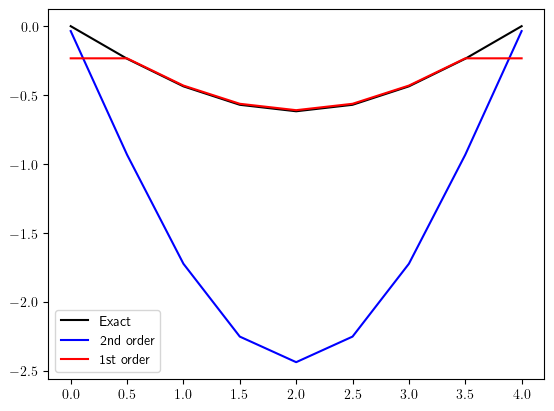

In [51]:
f = np.sin(np.pi*t / T)
d2fe = -(np.pi/T)**2*f
d2f = D2 @ f
d2f1 = D2e @ f
plt.plot(t, d2fe, 'k', t, d2f, 'b', t, d2f1, 'r')
plt.legend(['Exact', '2nd order', '1st order'])

In [52]:
D1 = sparse.diags([-np.ones(N), np.ones(N)], np.array([-1, 1]), (N+1, N+1), 'lil')
D1[0, :3] = -3, 4, -1
D1[-1, -3:] = 1, -4, 3
D1 *= (1/(2*dt))
print(D1.toarray()*(2*dt))

[[-3.  4. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -4.  3.]]


In [53]:
f = t
D1 @ f

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

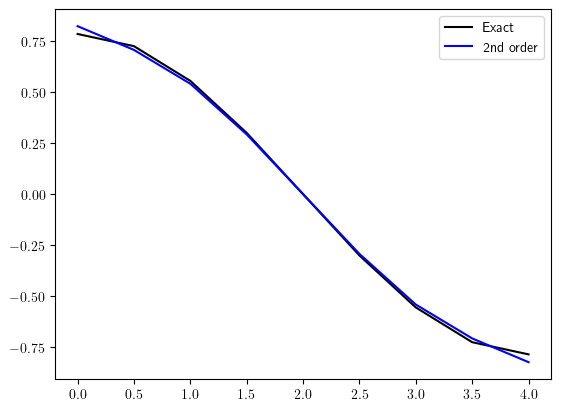

In [54]:
f = np.sin(np.pi*t / T)
d1fe = (np.pi/T)*np.cos(np.pi*t/T)
d1f = D1 @ f
plt.plot(t, d1fe, 'k', t, d1f, 'b')
plt.legend(['Exact', '2nd order'])

In [55]:
D2n = D1 @ D1
D2n.toarray()*dt**2

array([[ 1.25, -2.75,  1.75, -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75, -1.25,  0.25,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.25, -1.25,  0.75],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.75, -2.75,  1.25]])

In [56]:
f = np.sin(np.pi*t / T)
d2fe = -(np.pi/T)**2*f
e2 = D2 @ f - d2fe
en = D2n @ f - d2fe
np.sqrt(dt*np.linalg.norm(e2)), np.sqrt(dt*np.linalg.norm(en))

(1.3487689462745858, 0.37045090252771984)

In [57]:
D1 = sparse.diags([-np.ones(N), np.ones(N)], np.array([-1, 1]), (N+1, N+1), 'lil')
D1[0, :3] = -3, 4, -1. # Fix boundaries with second order accurate stencil
D1[-1, -3:] = 1, -4, 3
D1 *= (1/(2*dt))
Id = sparse.eye(N+1)
A = D1 + a*Id
b = np.zeros(N+1)
b[0] = I
A[0, :3] = 1, 0, 0 # boundary condition
A.toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  5.]])

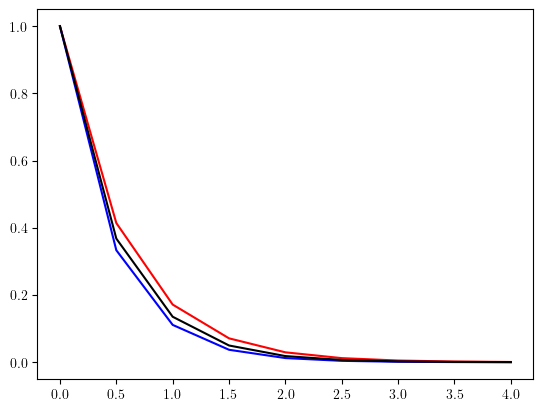

In [58]:
u1 = sparse.linalg.spsolve(A, b)
plt.plot(t, u1, 'r', t, u, 'b', t, np.exp(-a*t), 'k')

In [59]:
import sympy as sp
x, h = sp.symbols('x,h')
C = sp.Matrix([[1, -h, h**2/2], [1, 0, 0], [1, h, h**2/2]])
C

Matrix([
[1, -h, h**2/2],
[1,  0,      0],
[1,  h, h**2/2]])

In [60]:
C.inv()

Matrix([
[       0,       1,       0],
[-1/(2*h),       0, 1/(2*h)],
[ h**(-2), -2/h**2, h**(-2)]])

In [61]:
u = sp.Function('u')
coef = sp.Matrix([u(x-h), u(x), u(x+h)])
(C.inv())[2, :] @ coef

Matrix([[-2*u(x)/h**2 + u(-h + x)/h**2 + u(h + x)/h**2]])

In [62]:
C = sp.Matrix([[1, 0, 0], [1, h, h**2/2], [1, 2*h, 2*h**2]])
coef = sp.Matrix([u(x), u(x+h), u(x+2*h)])
(C.inv())[2, :] @ coef

Matrix([[u(x)/h**2 - 2*u(h + x)/h**2 + u(2*h + x)/h**2]])

In [63]:
C = sp.Matrix([[1, 0, 0, 0], [1, h, h**2/2, h**3/6], [1, 2*h, 2*h**2, 8*h**3/6], [1, 3*h, 9*h**2/2, 27*h**3/6]])
C.inv()

Matrix([
[        1,       0,        0,       0],
[-11/(6*h),     3/h, -3/(2*h), 1/(3*h)],
[   2/h**2, -5/h**2,   4/h**2, -1/h**2],
[  -1/h**3,  3/h**3,  -3/h**3, h**(-3)]])

In [64]:
coef = sp.Matrix([u(x), u(x+h), u(x+2*h), u(x+3*h)])
(C.inv())[2, :] @ coef

Matrix([[2*u(x)/h**2 - 5*u(h + x)/h**2 + 4*u(2*h + x)/h**2 - u(3*h + x)/h**2]])

In [65]:
C = sp.Matrix([[1, -3*h, 9*h**2/2, -27*h**3/6], [1, -2*h, 2*h**2, -8*h**3/6], [1, -h, h**2/2, -h**3/6], [1, 0, 0, 0]])
C.inv()

Matrix([
[       0,       0,       0,        1],
[-1/(3*h), 3/(2*h),    -3/h, 11/(6*h)],
[ -1/h**2,  4/h**2, -5/h**2,   2/h**2],
[ -1/h**3,  3/h**3, -3/h**3,  h**(-3)]])

In [66]:
coef = sp.Matrix([u(x-3*h), u(x-2*h), u(x-h), u(x)])
(C.inv())[1, :] @ coef

Matrix([[11*u(x)/(6*h) - u(-3*h + x)/(3*h) + 3*u(-2*h + x)/(2*h) - 3*u(-h + x)/h]])